In [1]:
#libraries and environments to use
from skimage import measure
import cv2 as cv # Graphic library
import time      # Count time
import winsound  # Make sound
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import numpy as np
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 100  # Image size
#from google.colab import files  # Download images from colab to PC

# Gaussiana una variable
---
<img src="Distribution.jpg" width=700 height=700 /> 

In [43]:
def F_Gauss(x,mu,sigma):
    return np.exp(-np.power((x-mu)/sigma,2)/2)/(sigma*np.sqrt(2*np.pi))

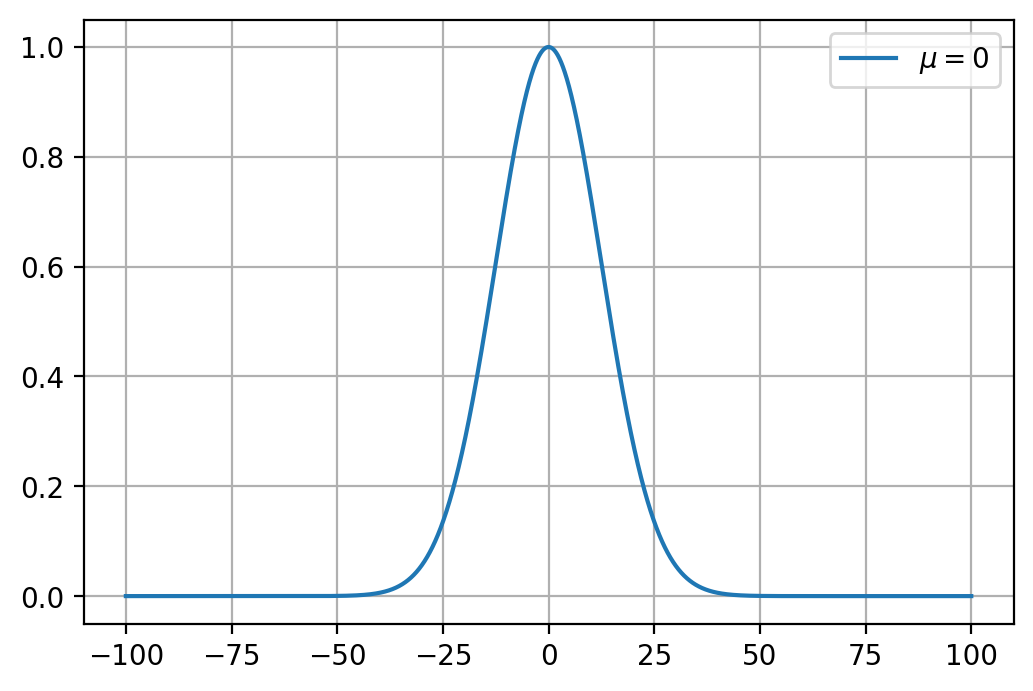

In [46]:
R=50
std=R/4
x=np.arange(-100,100,0.001)
mu=0
Gauss1=F_Gauss(x,0,std)
Gauss=Gauss1/Gauss1.max()

plt.plot(x,Gauss, label=r'$\mu=0$')
#plt.axvline(x=R, color='r', linestyle='-', label='4 $\sigma$')
#plt.axvline(x=-R, color='r', linestyle='-')
plt.legend()
plt.grid()
plt.show()

# Gaussiana con dos variables
---
<img src="3dDistribution.png" width=500 height=500 /> 

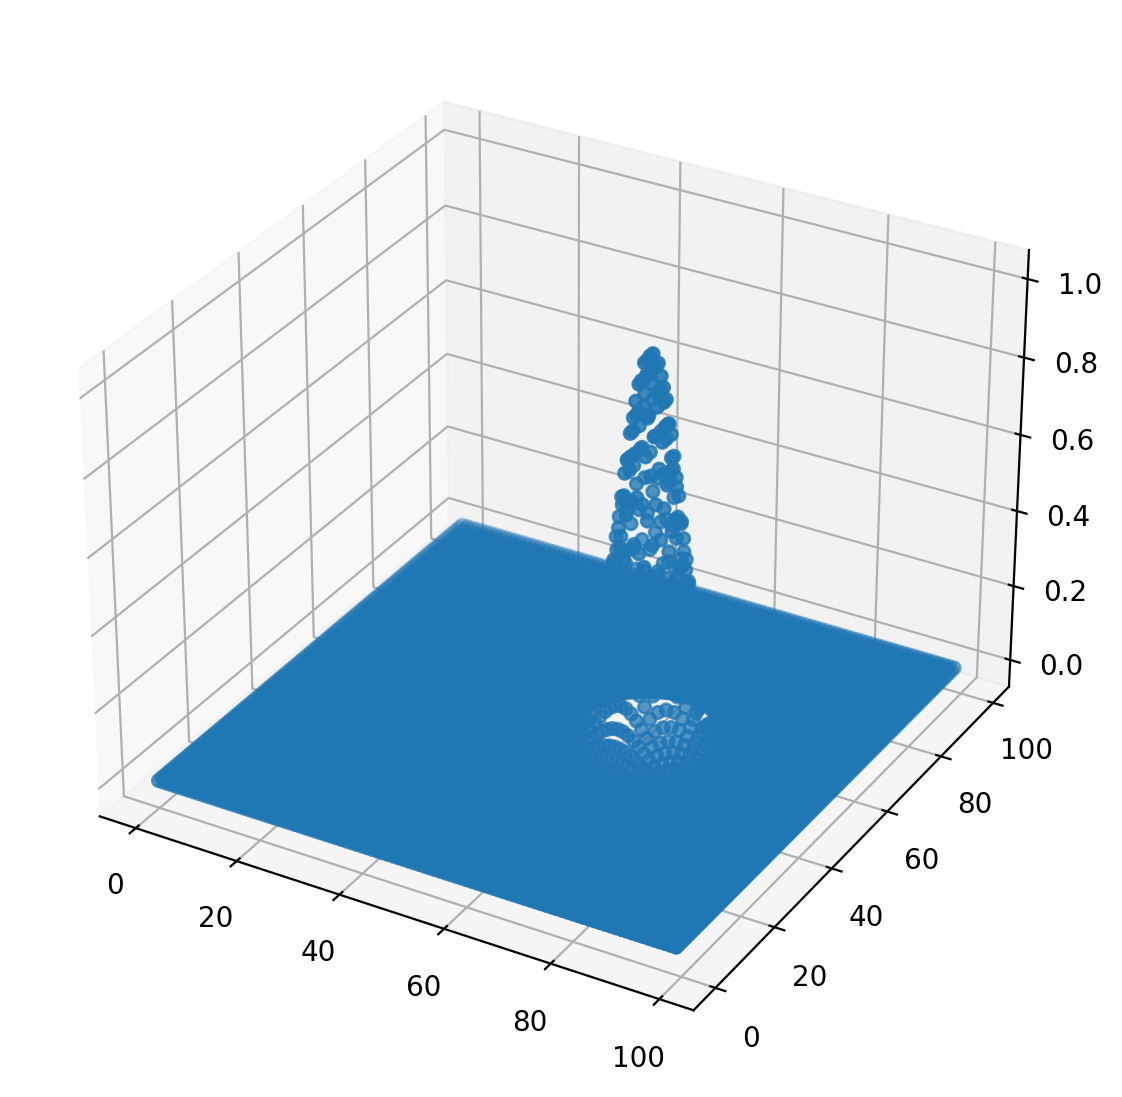

In [38]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
X=siu
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])
plt.show()

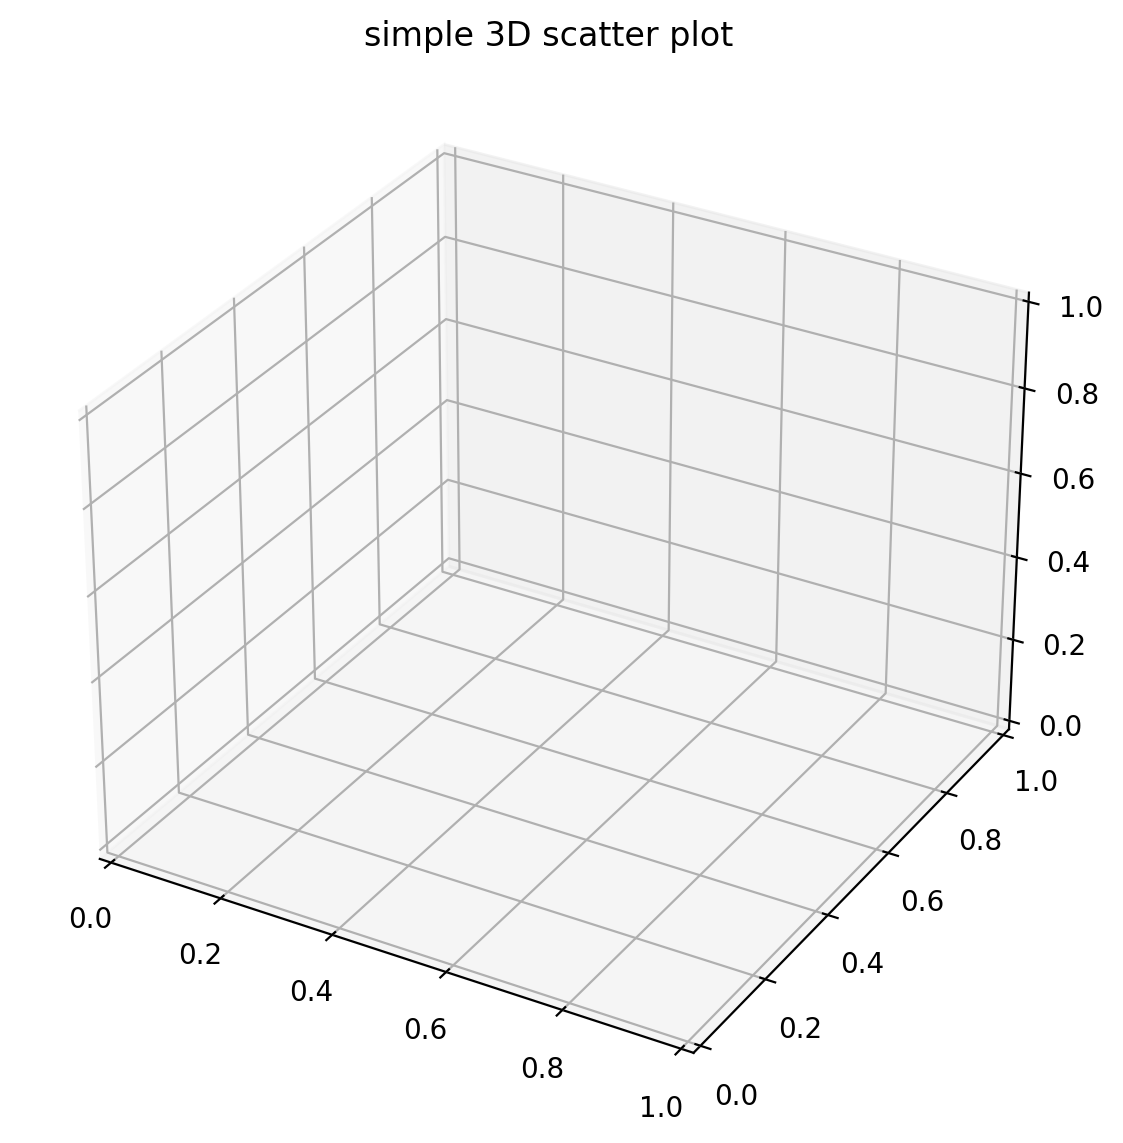

In [37]:
N=100
# Creating dataset
x = np.arange(N)
y = np.arange(N)
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
siu=np.zeros([N*N,3])
siu[:,0]=np.tile(x,N)
siu[:,1]=np.sort(np.tile(y,N))
siu[:,2]=patron_simul.flatten()

        #ax.scatter3D(x[i], y[j], patron_simul[i,j], color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [2]:
def gaus2d(x, y, mx, my, sx, sy):
    return 1. / (2.*np.pi*sx*sy) * np.exp(-((x-mx)**2. / (2.*sx**2.) + (y-my)**2. / (2.*sy**2.)))

In [34]:
R=50
N = 2*R

patron_simul= np.zeros([N,N])
mx=1.5
my=15
r=20
sx=r/4.
sy=r/4.
for i in range(0,N):
    for j in range(0,N):
        x, y = i-R, j-R
        patron_simul[i,j] = gaus2d(x, y, mx, my, sx, sy)
patron_simul=patron_simul/patron_simul.max()

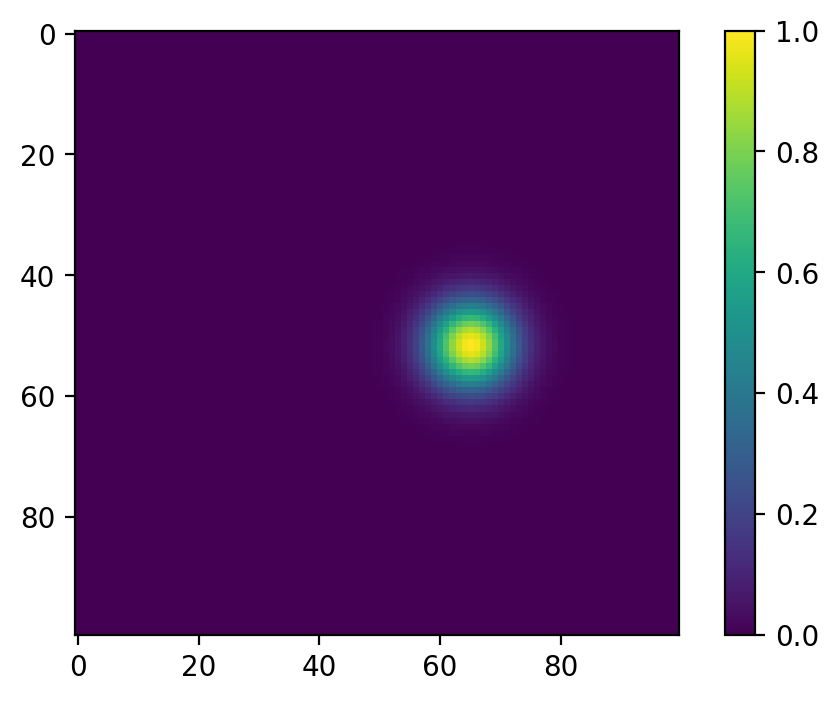

In [36]:
plt.imshow(patron_simul)
plt.colorbar()
#plt.xlim(50-10,50+10)
#plt.ylim(50-10,50+10)
plt.show()

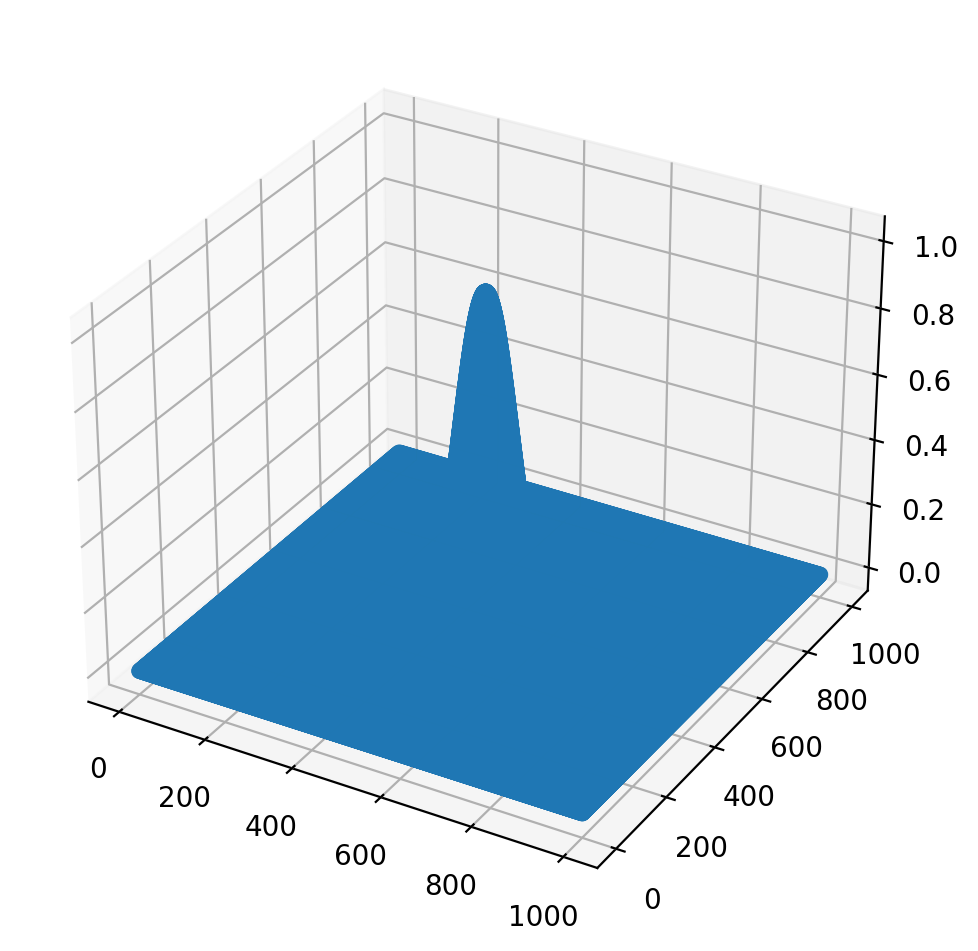

In [111]:
afm_data=patron_simul
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')
X, Y = np.meshgrid(np.linspace(0, len(afm_data), len(afm_data)), np.linspace(0, len(afm_data), len(afm_data)))
plot = ax.scatter(xs=X, ys=Y, zs=afm_data)

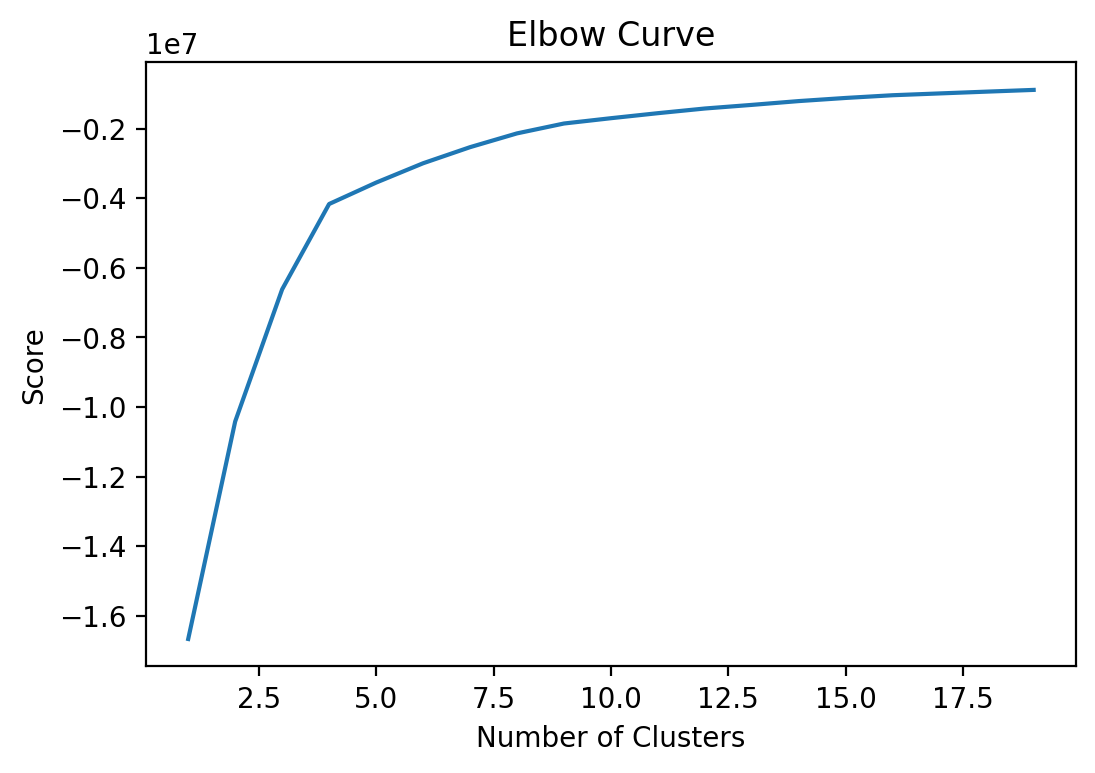

In [39]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=1).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.95000000e+01 4.95000000e+01 1.57866998e-02]]


[[4.95000000e+01 4.95000000e+01 1.57866998e-02]]


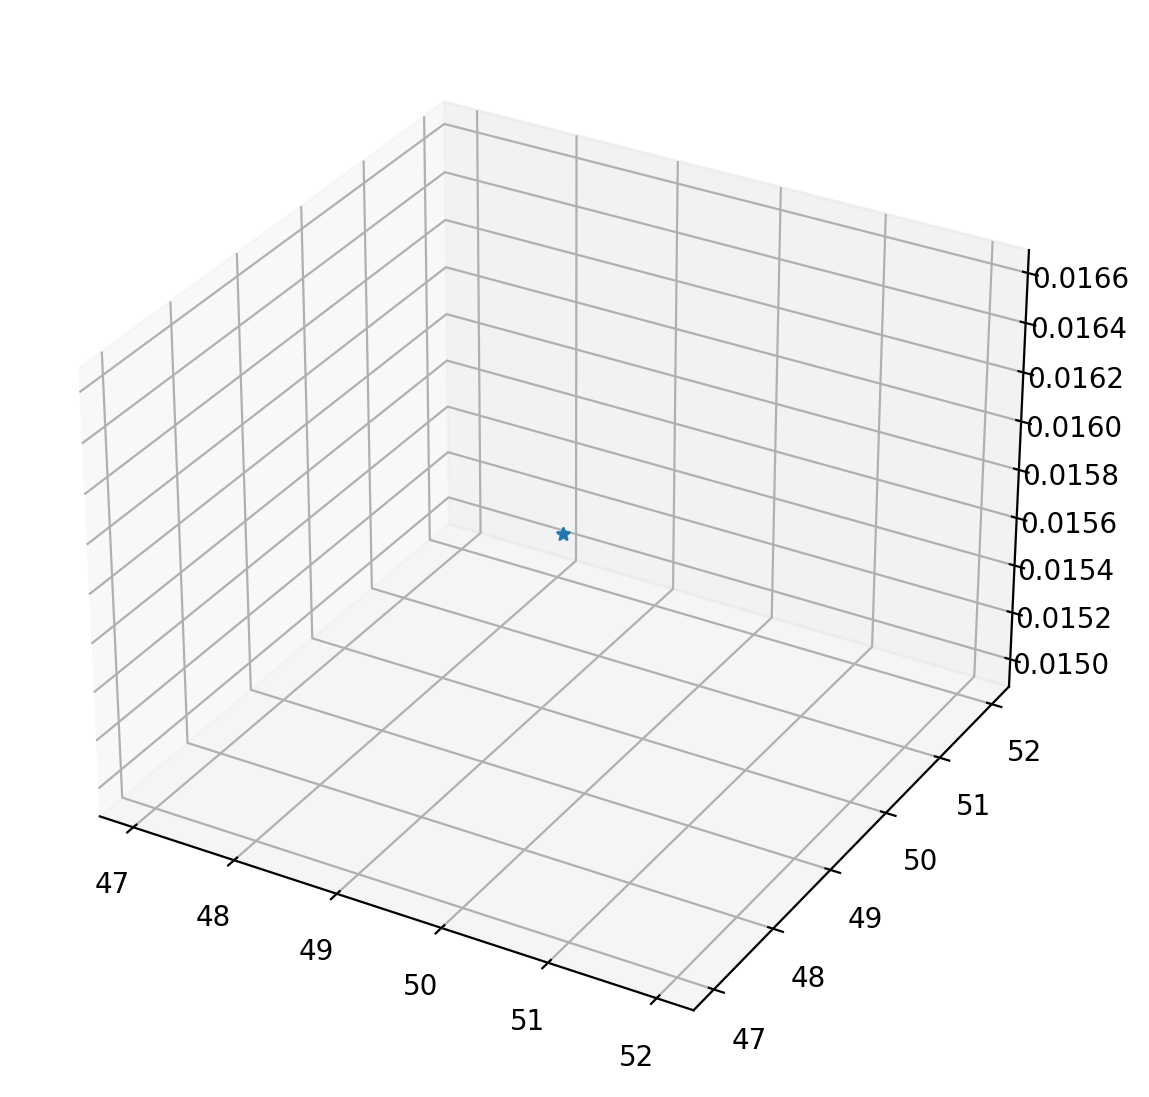

In [41]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)
 
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
#ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])
ax.scatter3D(C[:, 0], C[:, 1], C[:, 2], marker='*')
plt.show()

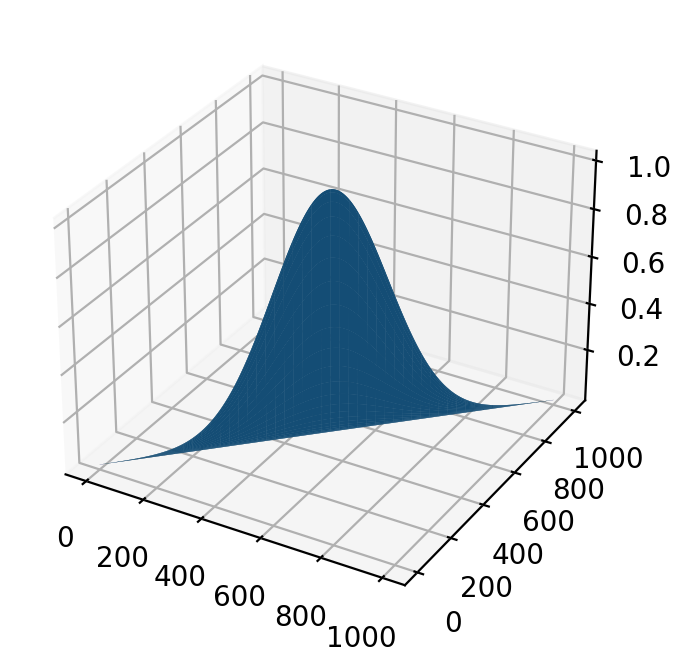

In [62]:
r=400
sx=r/4
sy=r/4

# 2-D grid
n = 1000
xrange = np.linspace(0,1000,n)
yrange = np.linspace(0,1000,n)
zrange = np.zeros([n,n])

# Build the profile
for i in range(n):
    for j in range(n):
        x, y = i-R, j-R
        zrange[i,j] = gaus2d(xrange[i],yrange[j],0.,0.,sx,sy)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface.
surf = ax.plot_surface(xrange, yrange, patron_simul)
plt.show()

In [72]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def np_bivariate_normal_pdf(domain, mean, variance):
    X = np.arange(-domain+mean, domain+mean, variance)
    Y = np.arange(-domain+mean, domain+mean, variance)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = ((1. / np.sqrt(2 * np.pi)) * np.exp(-.5*R**2))
    return X+mean, Y+mean, Z

def plt_plot_bivariate_normal_pdf(x, y, z):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z)
                  
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    plt.show()

C:\Users\Santiago RM\AppData\Local\Temp\ipykernel_3064\564526578.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


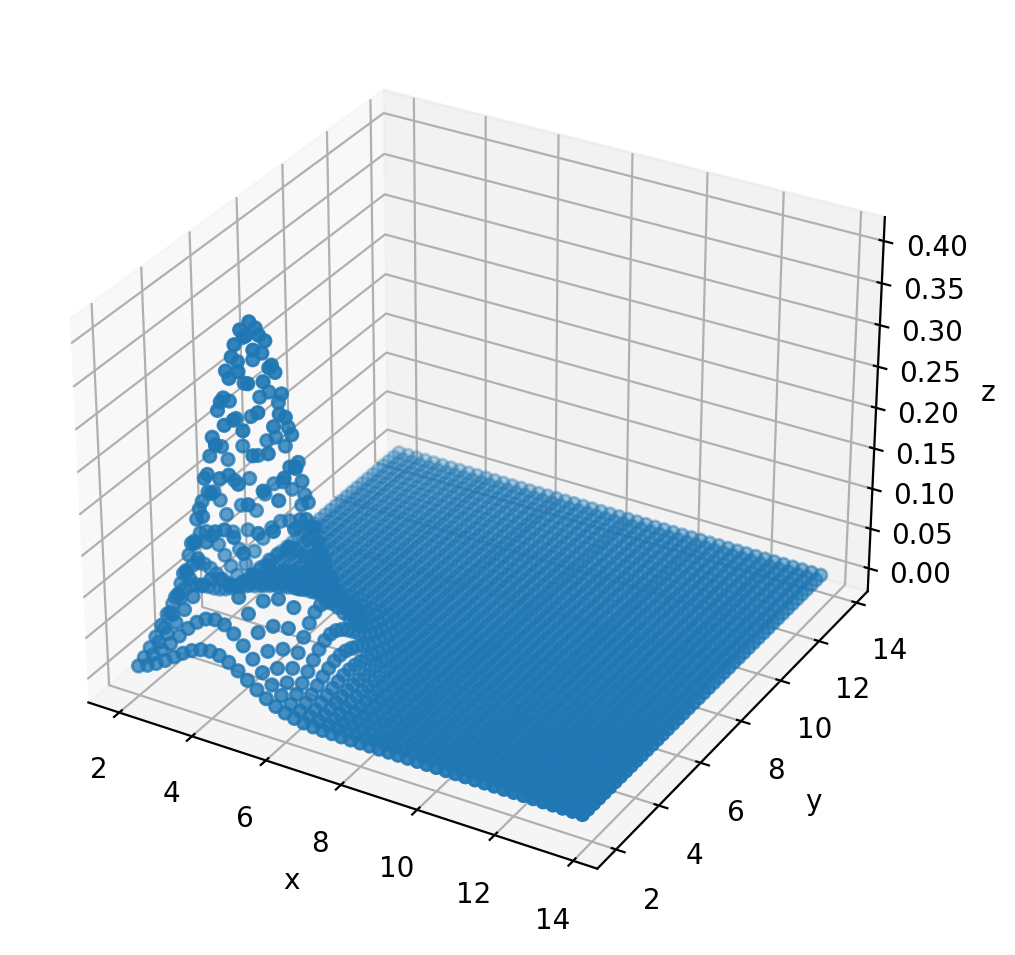

In [73]:
plt_plot_bivariate_normal_pdf(*np_bivariate_normal_pdf(6, 4, .25))

In [17]:
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Santiago RM\AppData\Local\Temp\ipykernel_3064\3959497561.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


TypeError: 'int' object is not iterable

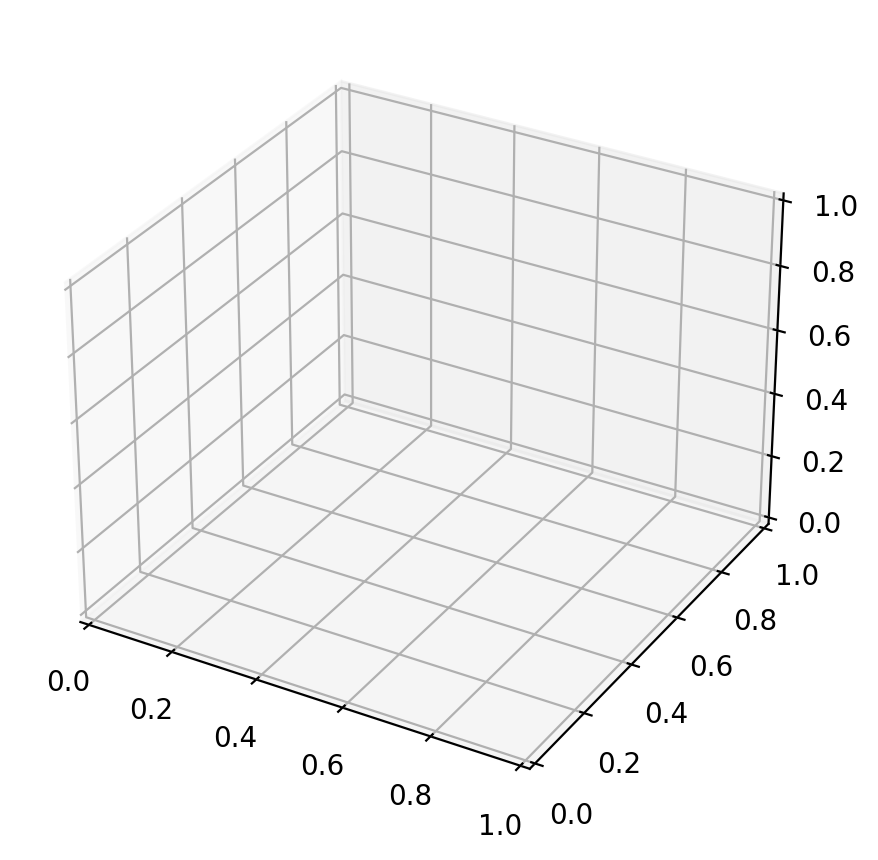

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(xrange[0,:], yrange[0,:], zrange[0,:], c=asignar,s=60)

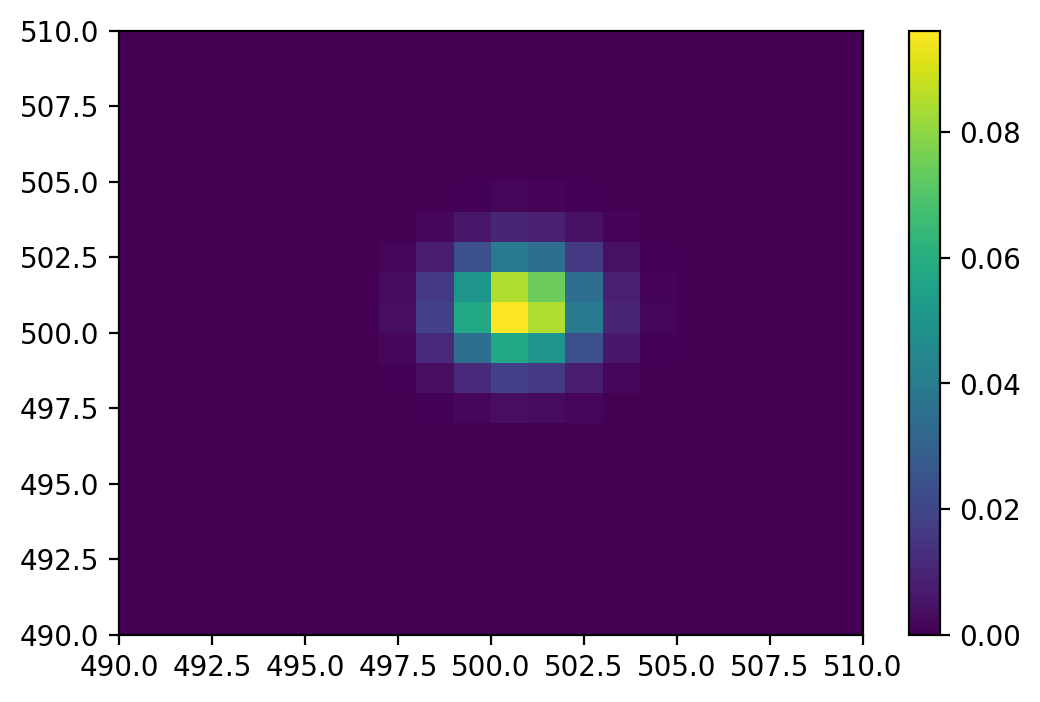

In [10]:
n = N
xrange = np.linspace(0,1000,n)
yrange = np.linspace(0,1000,n)
plt.pcolormesh(xrange,yrange, patron_simul)
plt.colorbar()
plt.xlim(500-10,500+10)
plt.ylim(500-10,500+10)
plt.show()

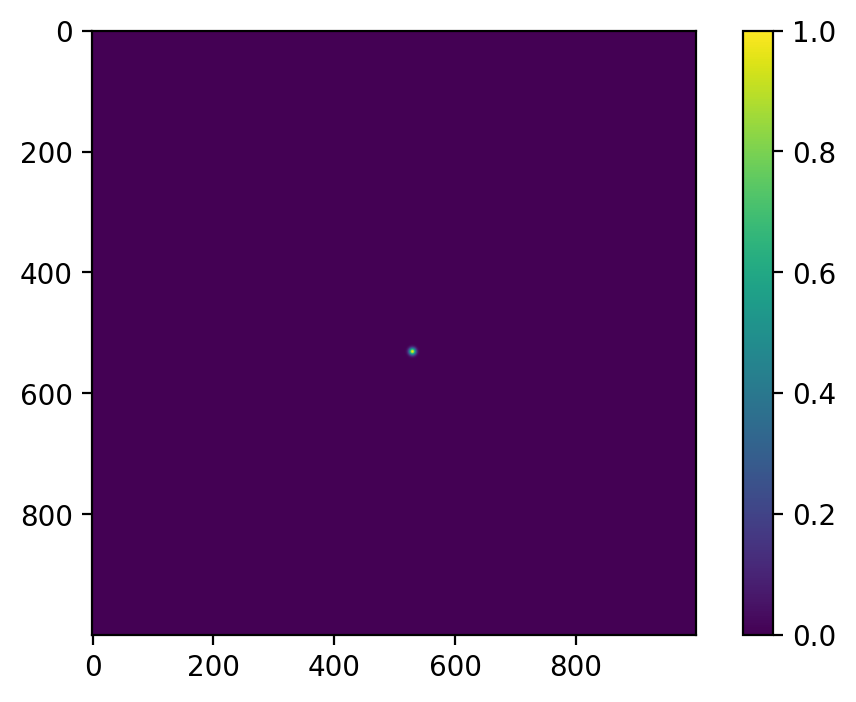

In [32]:
plt.imshow(patron_simul)
plt.colorbar()
#plt.xlim(500-10,500+10)
#plt.ylim(500-10,500+10)
plt.show()

In [16]:
def Dot_Gauss(diameter, std_P, simple_plot, save_name):
    '''
    Parameters:
    diameter (int or float) : Maximum radius (in pixels) of the distribution 
    std_P (float) : Intensity distribution in the radius
    simple_plot (bool): Show the plot without ticks, title and colorbar
    save_name (str): Name of the image to save
    '''
    w = int(diameter)
    M1 = np.zeros([w+3,w+3])
    mx=0.
    my=0.
    sx=w*std_P
    sy=w*std_P
    for i in range(0,len(M1)):
        for j in range(0,len(M1)):
            x, y = i-int(len(M1)/2), j-int(len(M1)/2)
            if ((x**2.0 + y**2.0)**0.5 < diameter/2):
                M1[i,j] = gaus2d(x, y, mx, my, sx, sy)
    
    M = 255*M1/M1.max()        
    plt.imshow(M) 
    
    if simple_plot==False:
        plt.colorbar()
        plt.title('Diametro de {} pixeles y $\sigma$={}'.format(int(diameter),sx))
    else:
        plt.axis('off')
    
    if len(save_name)>0:
        plt.savefig('{}.tif'.format(save_name))
    plt.show()
    return M

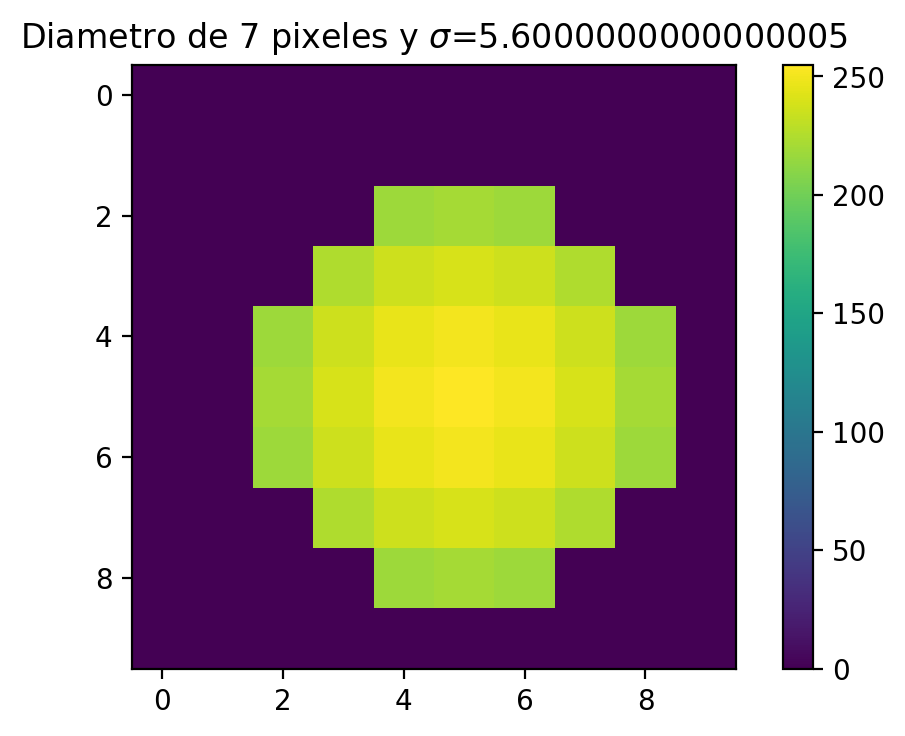

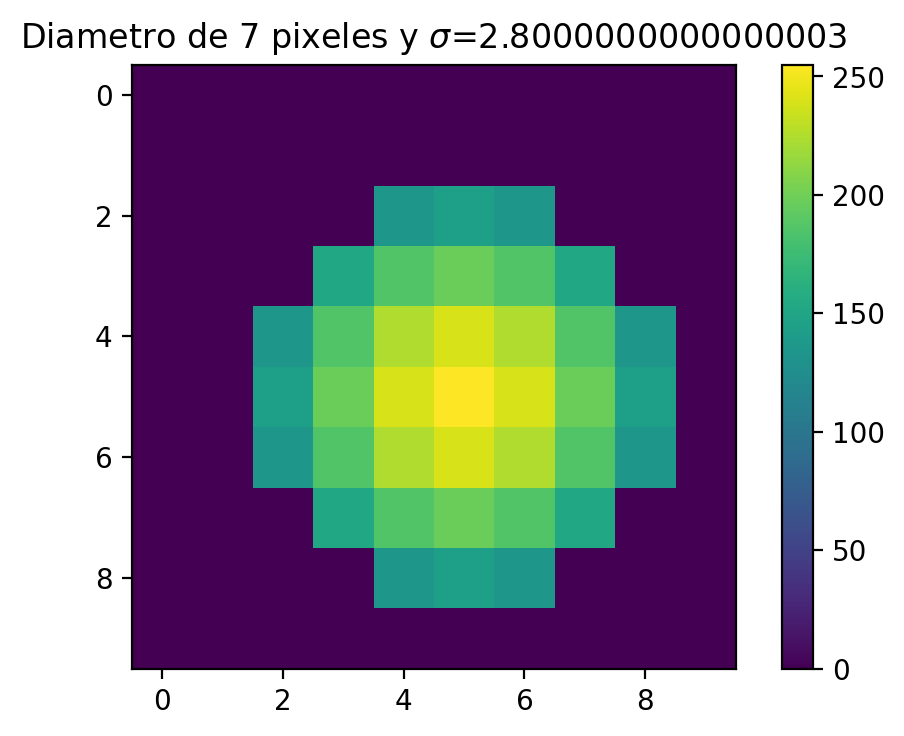

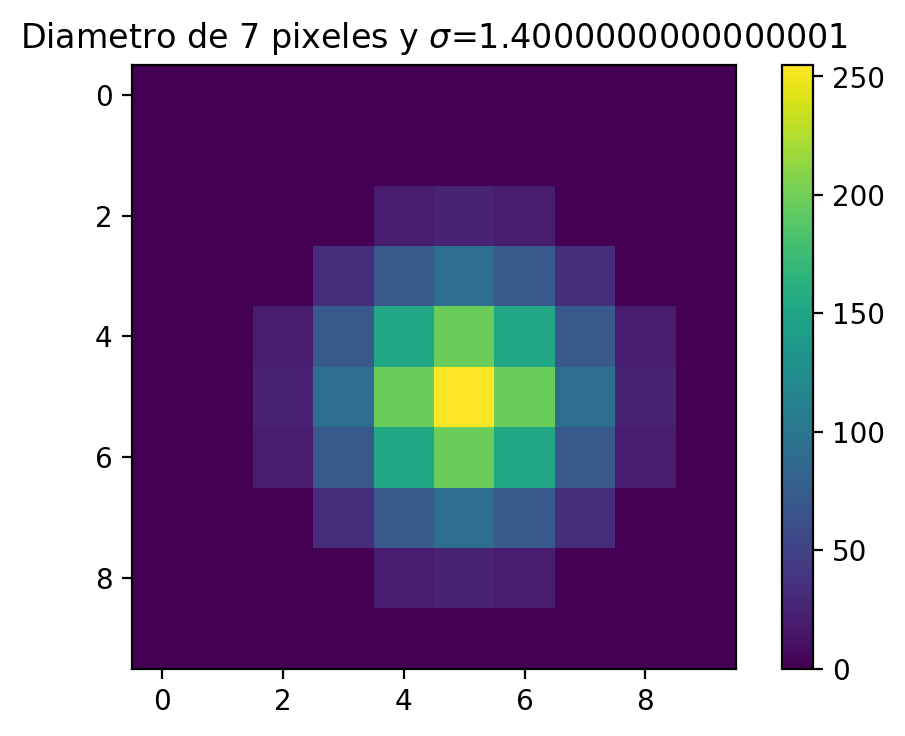

In [19]:
simple_plot=False
save_name=''
diameter=7

std_P=np.array([0.8,0.4,0.2])

test_a=Dot_Gauss(diameter, std_P[0], simple_plot, save_name)
test_b=Dot_Gauss(diameter, std_P[1], simple_plot, save_name)
test_c=Dot_Gauss(diameter, std_P[2], simple_plot, save_name)

# Simulando el patron de puntos
---
<img src="Ddots.png" width=600 height=600 /> 

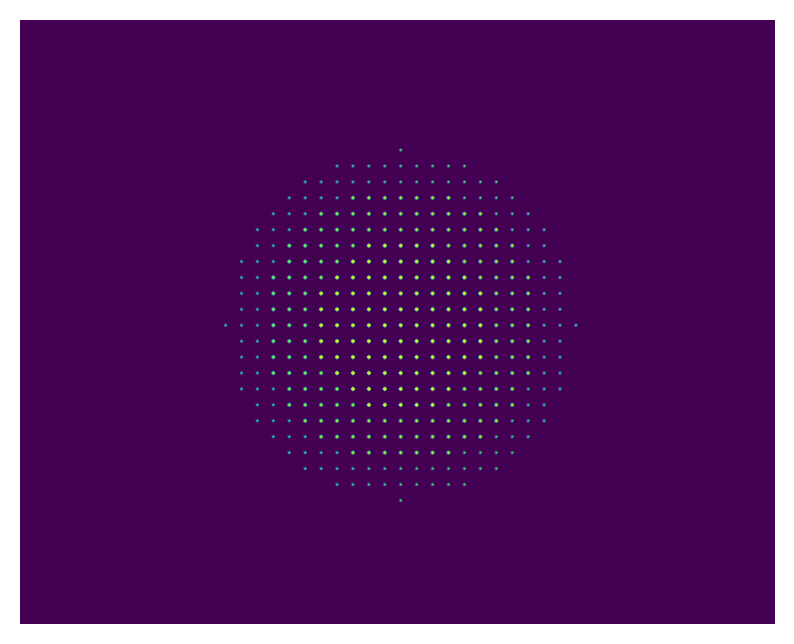

In [20]:
a=1024
b=1280

Patron_250simul=np.zeros([a, b])
n=np.shape(Patron_250simul)[0] # Size of vertical axis 1024
m=np.shape(Patron_250simul)[1] # Size of horizontal axis 1280

space_pix=27 #space between points
for k in range(-int(space_pix*11), int(space_pix*11+1), int(space_pix)):
    for l in range(-int(space_pix*11), int(space_pix*11+1), int(space_pix)):
        for i in range(len(test_a)): # or test_b or test_c, no problem
            for j in range(len(test_a)):
                R=(k**2.0 + l**2.0)**0.5
                if 0<=R<=space_pix*11*0.5:
                    Patron_250simul[i+int(a/2)+k, j+int(b/2)+l]=test_a[i,j]
                elif space_pix*11*0.5<R<=space_pix*11*0.8:
                    Patron_250simul[i+int(a/2)+k, j+int(b/2)+l]=test_b[i,j]
                elif space_pix*11*0.8<R<=space_pix*11:
                    Patron_250simul[i+int(a/2)+k, j+int(b/2)+l]=test_c[i,j]

plt.imshow(Patron_250simul)
plt.axis('off')
plt.savefig('simul250.tif')
plt.show()

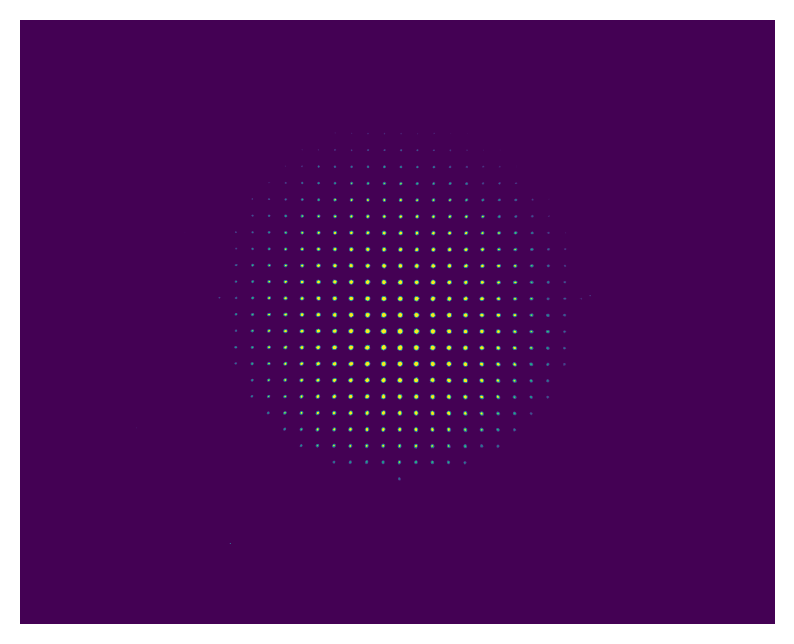

In [21]:
folder_file='06-abril-2022/REF250'
Patron_250ref=cv.imread('{}.tif'.format(folder_file),0)
plt.imshow(Patron_250ref)
plt.axis('off')
plt.show()

## Función que realiza la FFT a una imagen:

In [22]:
def FFT_LAP(folder_file, A, back_c, simple_plot, save_name):
    '''
    Parameters:
    folder_file (str): Location and name of the image, without .tif extension
    A (int): Amplification factor for better Fourier Transform quality
    back_c (float): Limit percentage of the maximum value to depreciate
    simple_plot (bool): Show the plot without ticks, title and colorbar
    save_name (str): Name of the image to save
    '''
    if type(folder_file)==str:
        Patron_LAP=cv.imread('{}.tif'.format(folder_file),0)
    else:
        Patron_LAP=folder_file
    # The 0 in cv.imread makes that only the black and white component is taken
    n=np.shape(Patron_LAP)[0] # Size of vertical axis
    m=np.shape(Patron_LAP)[1] # Size of horizontal axis
    
    max_value=Patron_LAP.max()
    
    if back_c != 0:
        for i in range(n):
            for j in range(m):
                if Patron_LAP[i,j] < max_value*back_c: # Rest of the bottom
                    Patron_LAP[i,j] = 0

    #Patron_LAP=Patron_LAP/max_value # Normalizing
    
    if A > 1:
        Patron_A_LAP=np.zeros((A*n,A*m)) # Empty expanded pattern
        cp_x=int(m*A/2)                  # Central point in x-direction
        cp_y=int(n*A/2)                  # Central point in y-direction
        for i in range(n):
            for j in range(m):
                Patron_A_LAP[i,j]=Patron_LAP[i,j] # Filling the expanded pattern
    else:
        Patron_A_LAP=Patron_LAP
        cp_x=int(m/2)
        cp_y=int(n/2)
    
    # Performing the 2D Fast Fourier Transform
    FT1=np.fft.fft2(Patron_A_LAP)
    FT2=np.abs(np.fft.fftshift(FT1))
    FT=FT2/FT2.max()                 # Normalizing
    
    xmin=int(cp_x*0.70)
    xmax=int(cp_x*1.3)
    ymin=int(cp_y*0.70)
    ymax=int(cp_y*1.3)
    
    img=(FT)[ymin:ymax, xmin:xmax]   # Crop the image
    plt.imshow(img) 
    
    if simple_plot==False:
        plt.colorbar()
        #plt.title('Pattern lens {} cm'.format(folder_file[-3:]))
    else:
        plt.axis('off')
    
    if len(save_name)>0:
        plt.savefig('{}.tif'.format(save_name))
        
    plt.show()
    return img

## Realizando FFT al patron simulado

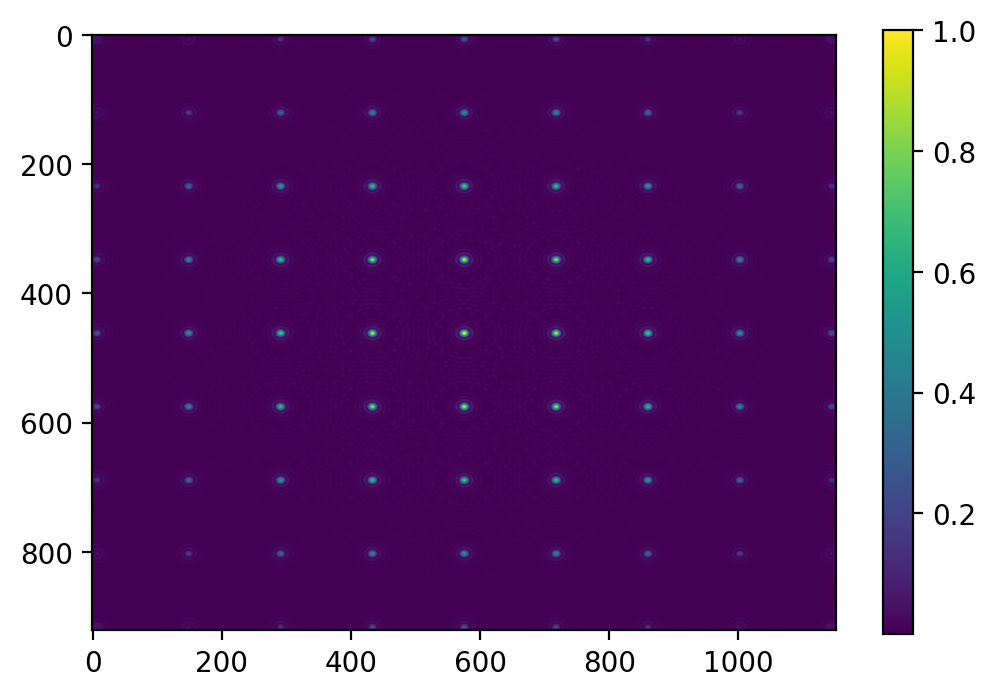

In [23]:
folder_file=Patron_250simul
A=3
back_c=0
simple_plot=False
save_name=''
simul_250=FFT_LAP(folder_file, A, back_c, simple_plot, save_name)

## Realizando FFT al patron de referencia experimental

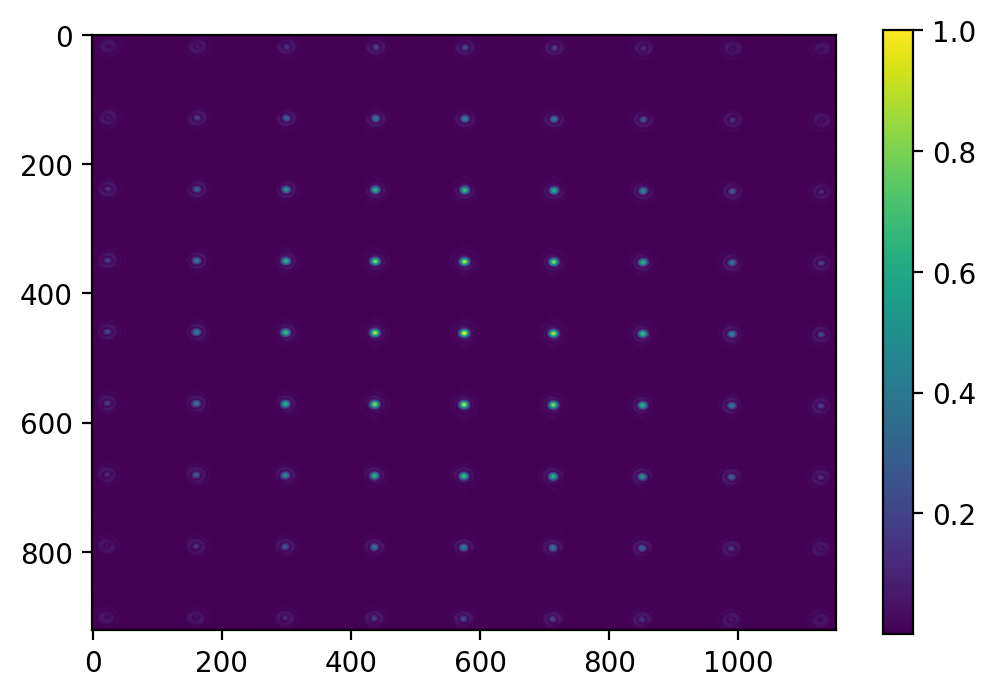

In [24]:
folder_file='06-abril-2022/REF250'
A=3
back_c=0
simple_plot=False
save_name=''
ref_250=FFT_LAP(folder_file, A, back_c, simple_plot, save_name)

In [25]:
np.size(simul_250)==np.size(ref_250)

True

# Observando los bordes

In [26]:
def contours(folder_file, simple_plot, save_name):
    '''
    Parameters:
    folder_file (str): Location and name of the image, without .tif extension
    simple_plot (bool): Show the plot without ticks, title and initial image
    save_name (str): Name of the image to save
    '''
    if type(folder_file)==str:
        img = cv.imread('{}.tif'.format(folder_file),0)
    else:
        img = folder_file
        
    n=np.shape(img)[0] # Size of vertical axis
    m=np.shape(img)[1] # Size of horizontal axis
    contours = measure.find_contours(img,0.07)

    # Display the image and plot all contours found
    fig, ax = plt.subplots(figsize=(6,5))
    #ax.imshow(img,cmap='gray')
    
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1,color='b')
    
    if simple_plot==False:
        #plt.title('Pattern lens {} cm'.format(folder_file[-6:]))
        ax.imshow(img,cmap='gray')
    else:
        ax.set_xticks([])
        ax.set_yticks([])
    
    if len(save_name)>0:
        plt.savefig('{}.tif'.format(save_name))
        
    plt.show()
    return contours
    

## Contornos del patron simulado y su FFT

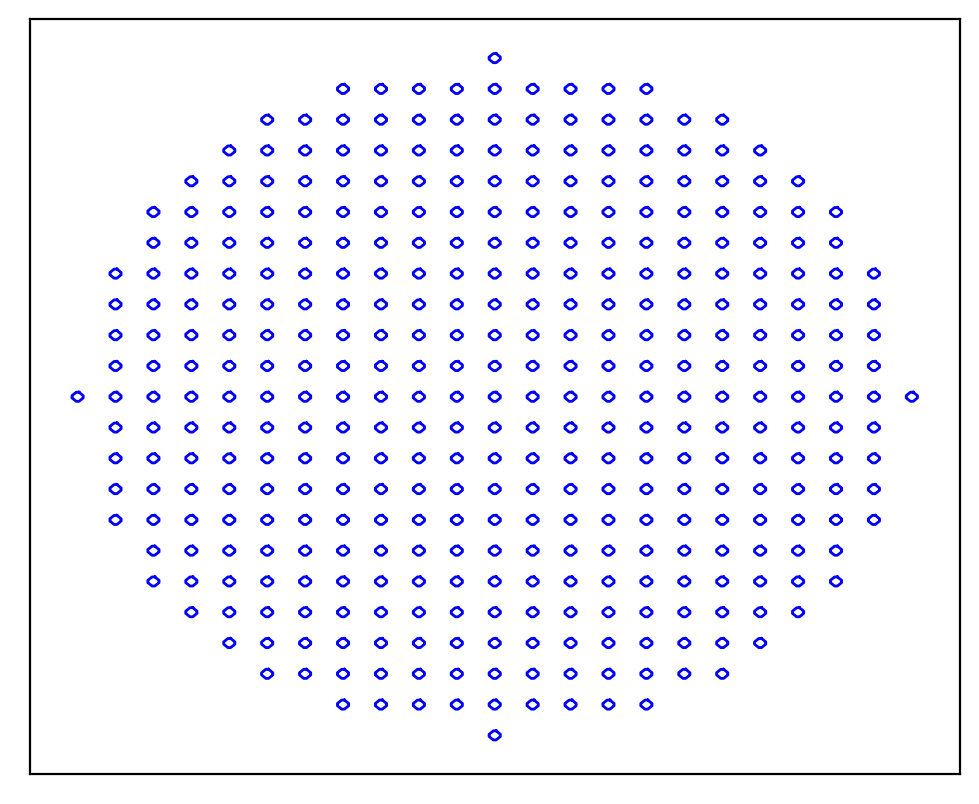

In [27]:
folder_file=Patron_250simul
simple_plot=True
save_name=''
v=contours(folder_file, simple_plot, save_name)

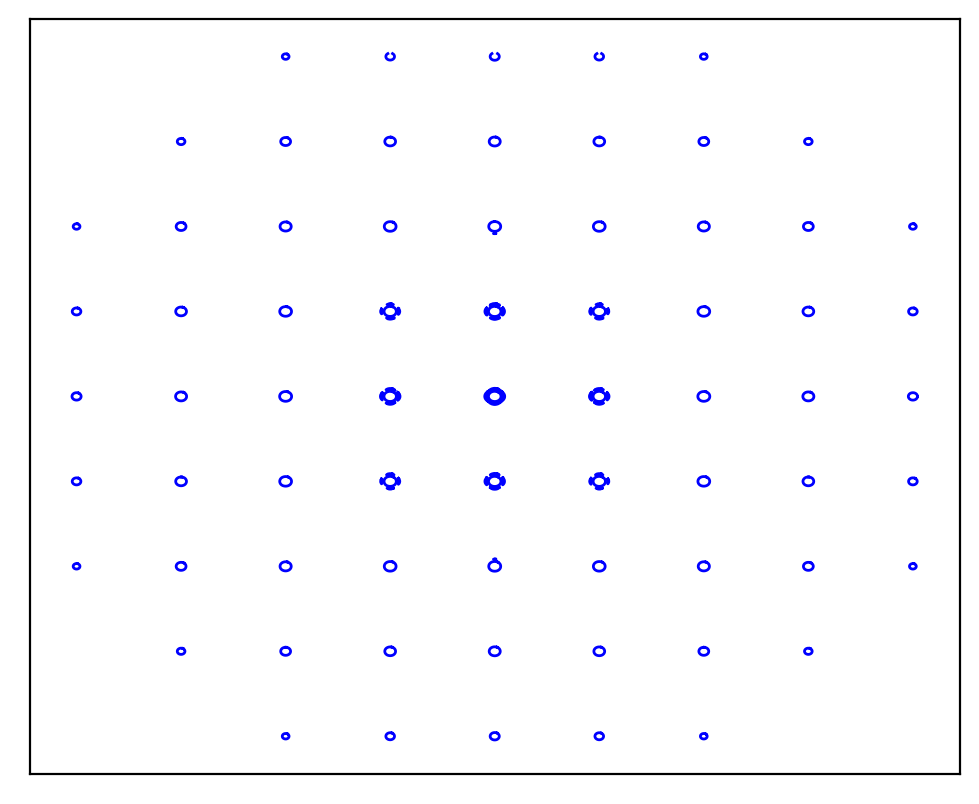

In [28]:
folder_file=simul_250
simple_plot=True
save_name=''
v=contours(folder_file, simple_plot, save_name)

## Contornos de la referencia experimental y su FFT

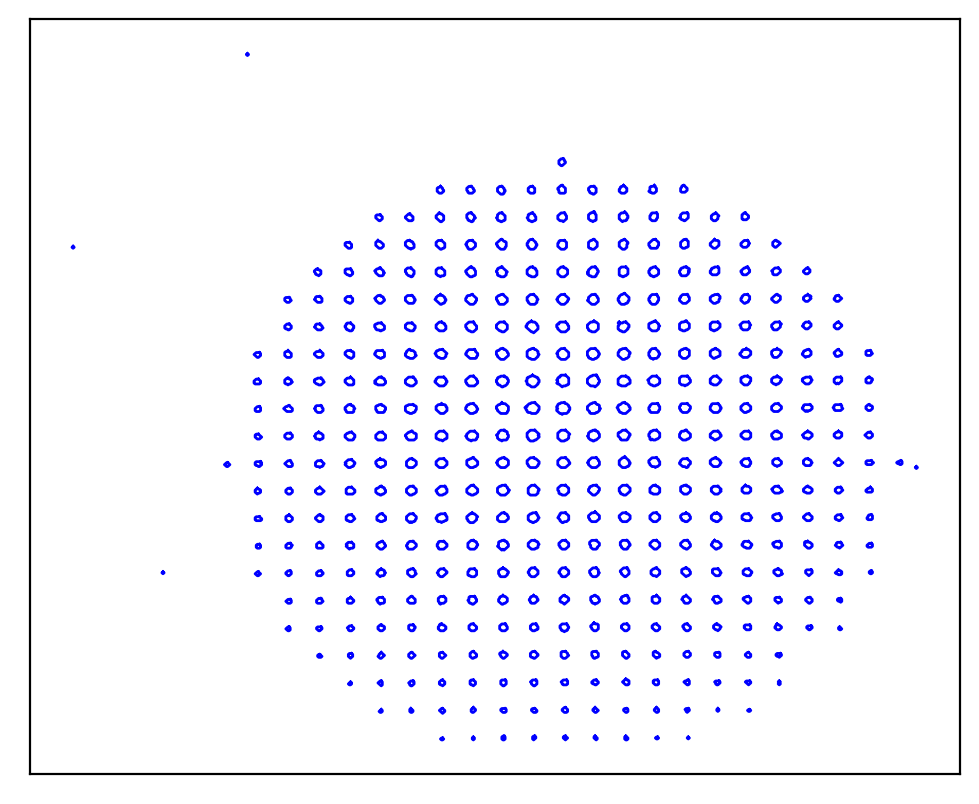

In [29]:
folder_file='06-abril-2022/REF250'
simple_plot=True
save_name=''
v=contours(folder_file, simple_plot, save_name)

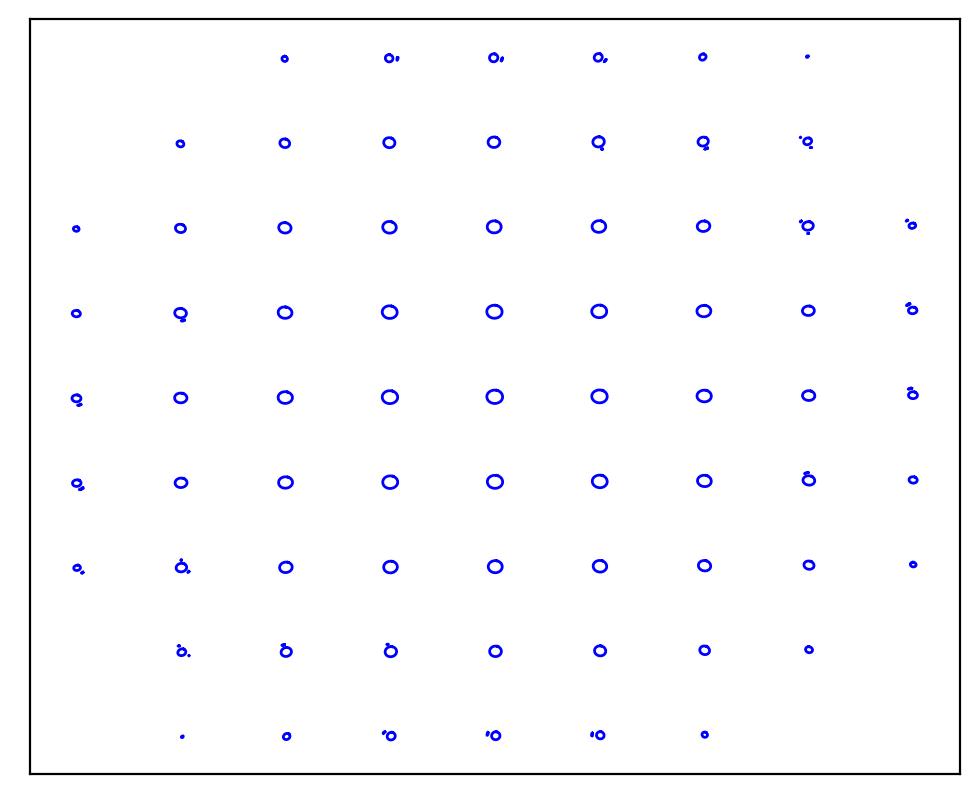

In [30]:
folder_file=ref_250
simple_plot=True
save_name=''
v=contours(folder_file, simple_plot, save_name)

# **Lobe location reference (clockwise)**
<img src="lobels.png" width=520 height=520 /> 

## <span style="color:red">First lobe : L1 $\;\;$  <span style="color:blue">Second lobe : L2 $\;\;$ <span style="color:purple">Third lobe : L3 $\;\;$<span style="color:green">Fourth lobe : L4

In [33]:
#folder_file=Patron_250simul
#Patron_LAP1=cv.imread('{}.tif'.format(folder_file),0)

img_raw=ref_250
roi = cv.selectROI(img_raw)

#print rectangle points of selected roi
print(roi)

#Crop selected roi from raw image
roi_cropped = img_raw[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]

#show cropped image
cv.imshow("ROI", roi_cropped)

#cv.imwrite("crop.tif",roi_cropped)

#hold window
cv.waitKey(0)
cv.destroyAllWindows()

(665, 406, 101, 109)


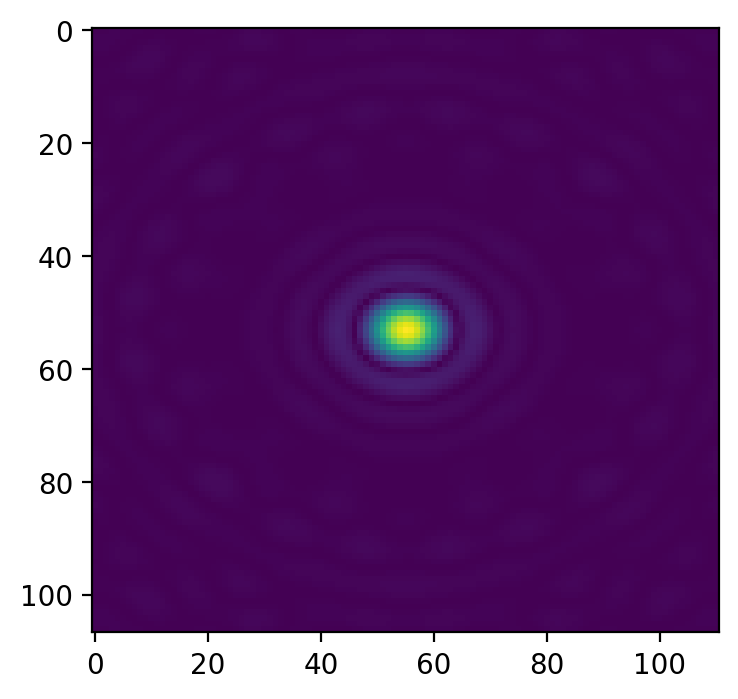

In [32]:
img_cropped_simul=img_raw[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
plt.imshow(img_cropped_simul)
plt.show()

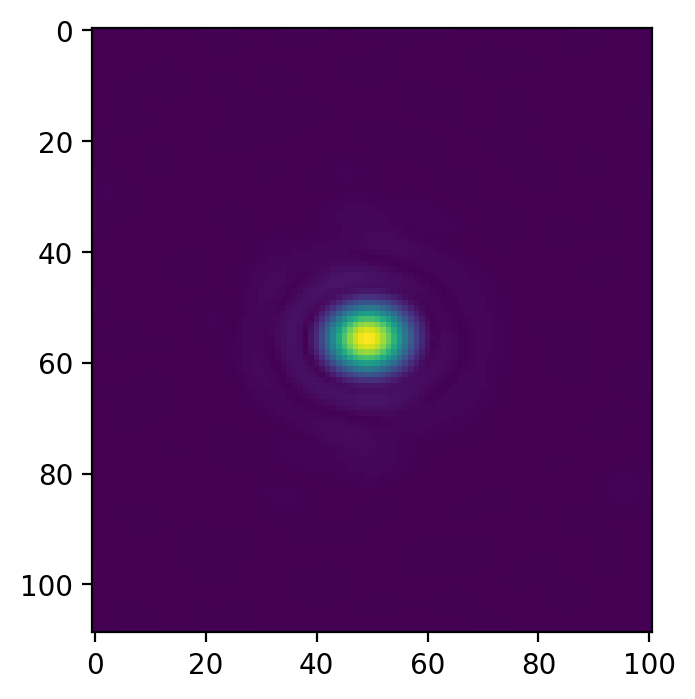

In [34]:
img_cropped_ref=img_raw[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
plt.imshow(img_cropped_ref)
plt.show()

## Imagen simulada

In [35]:
result = np.where(img_cropped_simul == np.amax(img_cropped_simul))
print('Tuple of arrays returned : ', result)
print('List of coordinates of maximum value in Numpy array : ')
# zip the 2 arrays to get the exact coordinates
listOfCordinates = list(zip(result[0], result[1]))
# travese over the list of cordinates
for cord in listOfCordinates:
    print(cord)

Tuple of arrays returned :  (array([53], dtype=int64), array([55], dtype=int64))
List of coordinates of maximum value in Numpy array : 
(53, 55)


## Imagen de referencia experimental

In [36]:
result = np.where(img_cropped_ref == np.amax(img_cropped_ref))
print('Tuple of arrays returned : ', result)
print('List of coordinates of maximum value in Numpy array : ')

listOfCordinates = list(zip(result[0], result[1]))

for cord in listOfCordinates:
    print(cord)

Tuple of arrays returned :  (array([56], dtype=int64), array([49], dtype=int64))
List of coordinates of maximum value in Numpy array : 
(56, 49)


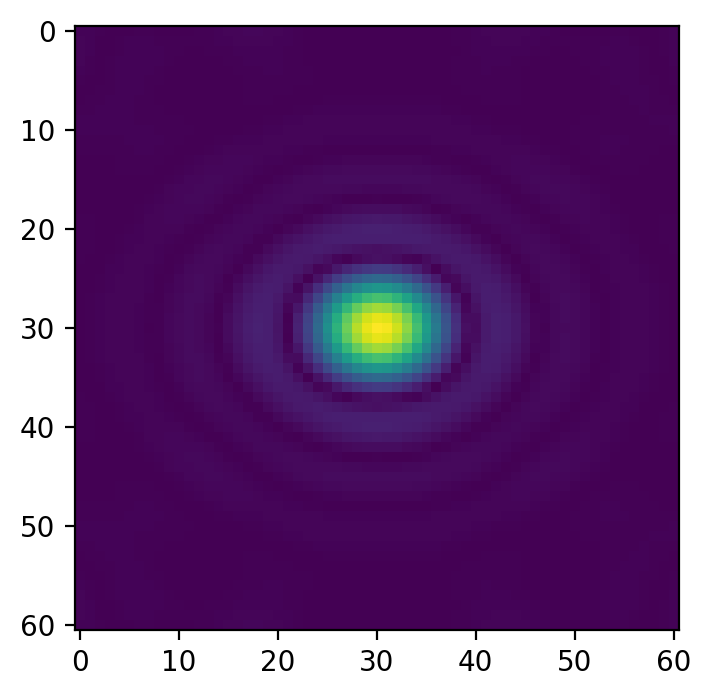

In [37]:
img_simul=img_cropped_simul[23:83+1,25:85+1]
plt.imshow(img_simul)
plt.show()

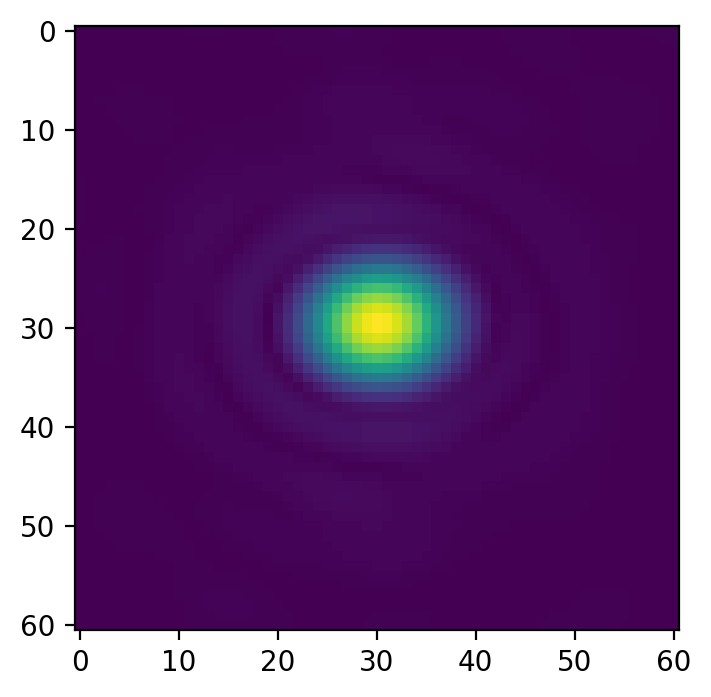

In [38]:
img_ref=img_cropped_ref[26:86+1,19:79+1]
plt.imshow(img_ref)
plt.show()

In [39]:
np.size(img_simul)==np.size(img_ref)

True

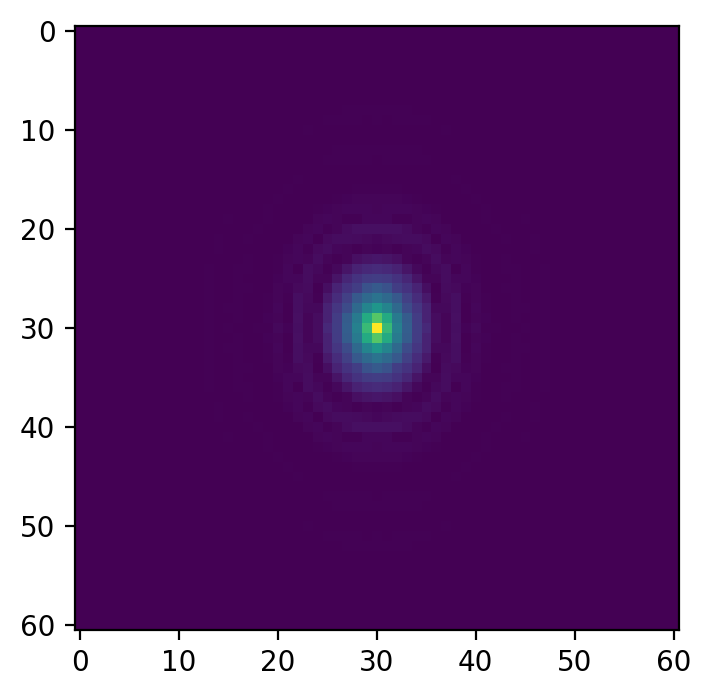

In [62]:
IFT1=np.fft.ifft2(img_simul)
IFT2=np.abs(np.fft.fftshift(IFT1))
IFT_simul=IFT2/IFT2.max()
plt.imshow(IFT_simul)
plt.show()

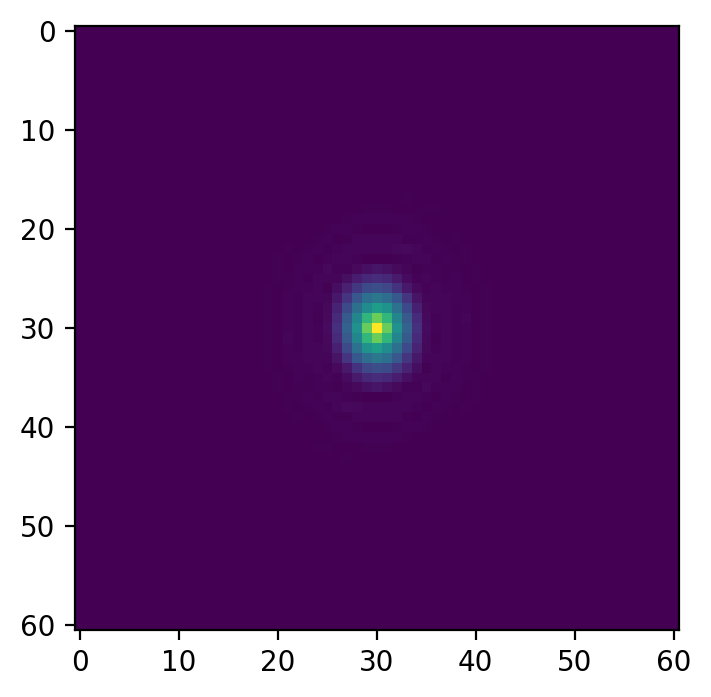

In [61]:
IFT1=np.fft.ifft2(img_ref)
IFT2=np.abs(np.fft.fftshift(IFT1))
IFT_ref=IFT2/IFT2.max()
plt.imshow(IFT_ref)
plt.show()

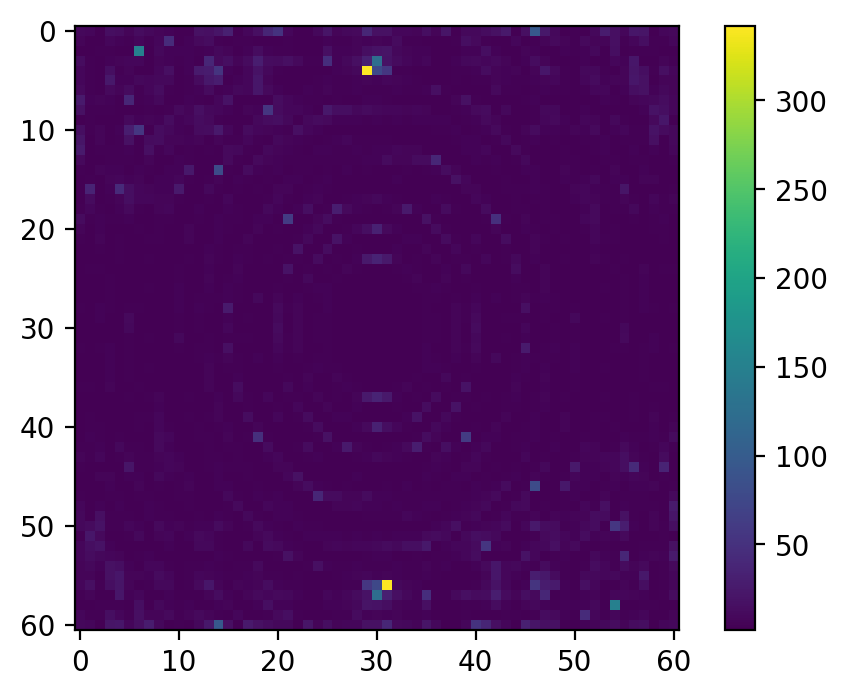

In [64]:
IMG1=IFT_ref/IFT_simul
IMG2=IFT_simul/IFT_ref
IMG=IMG1+IMG2
plt.imshow(IMG)
plt.colorbar()
plt.show()

In [ ]:
Patron=img_cropped_ref
contours = measure.find_contours(Patron,0.015)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(Patron)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1,color='r')
#ax.plot(contours[:, 1], contours[:, 0], linewidth=1,color='r')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
n=np.shape(test)[0] # Size of vertical axis
m=np.shape(test)[1] # Size of horizontal axis
cp_x=int(m/2)
cp_y=int(n/2)
lobe='L1'
#if lobe=='L1':
xmin=int(cp_x*0.8)
xmax=int(cp_x*1.2)
ymin=int(cp_y*0.4)
ymax=int(cp_y*1.1)
#if lobe=='L2':
xmin=int(cp_x*1.2)
xmax=int(cp_x*1.6)
ymin=int(cp_y*0.8)
ymax=int(cp_y*1.2)
#if lobe=='L3':
#xmin=int(cp_x*0.8)
#xmax=int(cp_x*1.2)
#ymin=int(cp_y*0.9)
#ymax=int(cp_y*1.6)
#y max 1.6 y 0.4

In [ ]:
img_test=test[ymin:ymax, xmin:xmax] 
plt.imshow(img_test,cmap='gray')
#axis('off')
#savefig('corte.png')
plt.show()